In [1]:
import pandas
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import time 
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [3]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [5]:
random.seed(42)
#hallways
hallway_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\hallway1.csv")
hallway_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\hallway2.csv")
hallway_2 = hallway_2.drop(0)
hallway_3 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\hallway3.csv")
hallway_3 = hallway_3.drop(0)
all_hallways = pandas.concat([hallway_1, hallway_2], axis = 0)
all_hallways = pandas.concat([all_hallways,hallway_3], axis = 0)
hallways_length = len(all_hallways['time'])
hallways_category = ["HALLWAY"] * hallways_length
all_hallways["category"] = hallways_category
print(all_hallways)
#chairs
open_chair_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\openchair1.csv")
open_chair_1 = open_chair_1.drop(0)
open_chair_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\openchair2.csv")
open_chair_2 = open_chair_2.drop(0)
open_chair_3 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\openchair3.csv")
open_chair_3 = open_chair_3.drop(0)
all_open_chairs = pandas.concat([open_chair_1, open_chair_2], axis = 0)
all_open_chairs = pandas.concat([all_open_chairs, open_chair_3], axis = 0)
chairs_length = len(all_open_chairs['time'])
chairs_category = ["OPEN_CHAIRS"] * chairs_length
all_open_chairs["category"] = chairs_category
#print(all_open_chairs)

#blinds
mr_blinds_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrblinds1.csv")
mr_blinds_1 = mr_blinds_1.drop(0)
mr_blinds_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrblinds2.csv")
mr_blinds_2 = mr_blinds_2.drop(0)
mr_blinds_3 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrblinds3.csv")
mr_blinds_3 = mr_blinds_3.drop(0)
mr3_blinds_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mr3blinds1.csv")
mr3_blinds_1 = mr3_blinds_1.drop(0)
mr3_blinds_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mr3blinds2.csv")
mr3_blinds_2 = mr3_blinds_2.drop(0)
mr3_blinds_3 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mr3blinds3.csv")
mr3_blinds_3 = mr3_blinds_3.drop(0)
all_mr_blinds = pandas.concat([mr_blinds_1, mr_blinds_2], axis=0)
all_mr_blinds = pandas.concat([all_mr_blinds, mr_blinds_3], axis = 0)
all_mr_blinds = pandas.concat([all_mr_blinds, mr3_blinds_1], axis = 0)
all_mr_blinds = pandas.concat([all_mr_blinds, mr3_blinds_2], axis = 0)
all_mr_blinds = pandas.concat([all_mr_blinds, mr3_blinds_3], axis = 0)
blinds_length = len(all_mr_blinds['time'])
blinds_category = ["BLINDS"] * blinds_length
all_mr_blinds["category"] = blinds_category
#print(all_mr_blinds)

#windows
mr_windows_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrwindows1.csv")
mr_windows_1 = mr_windows_1.drop(0)
mr_windows_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrwindows2.csv")
mr_windows_2 = mr_windows_2.drop(0)
mr_windows_3 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\mrwindows3.csv")
mr_windows_3 = mr_windows_3.drop(0)
all_mr_windows = pandas.concat([mr_windows_1, mr_windows_2], axis = 0)
all_mr_windows = pandas.concat([all_mr_windows, mr_windows_3], axis = 0)
windows_length = len(all_mr_windows['time'])
windows_category = ["WINDOWS"] * windows_length
all_mr_windows["category"] = windows_category
#print(all_mr_windows)

#entrance
pp_entrance = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\ppentrance.csv")
entrance_length = len(pp_entrance['time'])
entrance_category = ["ENTRANCE"] * entrance_length
pp_entrance["category"] = entrance_category
#print(pp_entrance)

#lab
pp_lab_1 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\pplab.csv")
pp_lab_1 = pp_lab_1.drop(0)
pp_lab_2 = pandas.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\data2\pplab2.csv")
pp_lab_2 = pp_lab_2.drop(0)
all_lab = pandas.concat([pp_lab_1, pp_lab_2],  axis = 0)
lab_length = len(all_lab['time'])
lab_category = ["LAB"] * lab_length
all_lab["category"] = lab_category
#print(all_lab)

#combining everything

all_frames = pandas.concat([all_hallways, all_open_chairs], axis = 0)
all_frames = pandas.concat([all_frames, all_mr_blinds], axis = 0)
all_frames = pandas.concat([all_frames, all_mr_windows], axis = 0)
all_frames = pandas.concat([all_frames, pp_entrance], axis = 0)
all_frames = pandas.concat([all_frames, all_lab], axis = 0)
all_frames['category'] = all_frames['category'].astype(str)

        time  wearable      soc     cvip      cpu      gpu   5v_sys  \
0      0.003   5420000  1140000  1649000   731000   105000  6232000   
1      0.204   5420000  1408000  2138000  1078000  5465000  6232000   
2      0.402   5365000  1198000  1710000   751000   105000  6263000   
3      0.602   5365000  1309000  1378000   740000   105000  6263000   
4      0.802   5365000   914000  2194000   670000   105000  6263000   
..       ...       ...      ...      ...      ...      ...      ...   
657  131.404   5490000  1189000  1971000   847000   858000  6464000   
658  131.604   5478000  1129000  2161000   670000   670000  6411000   
659  131.804   5478000  1189000  2351000  1645000   935000  6411000   
660  132.004   5478000   968000  1639000   819000   398000  6316000   
661  132.204   5435000  1028000  2138000   691000  3727000  6316000   

     nvme_pwr1  nvme_pwr3  nvme_pwr2  ...  Tboard_soc1tmp  Tdiode_soc1tmp  \
0        79000      32000      11000  ...           118.4          114

In [7]:
start = time.perf_counter()
X = all_frames.iloc[:,:-1]
y = all_frames['category']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
sc = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train.iloc[:,:] = sc.fit_transform(X_train)
X_test.iloc[:,:] = sc.transform(X_test)
svm = SVC(decision_function_shape='ovo', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
end = time.perf_counter()
print(end-start)
print(len(all_frames.columns))

0.9810646659521257
7.939166900000004
27


In [9]:
arr =signaltonoise(X)

C:\Users\jesun\AppData\Local\Temp\ipykernel_21184\2739071268.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.where(sd == 0, 0, m/sd)


In [11]:
total = sum(arr)
print(total/len(arr))

15.098852289230706


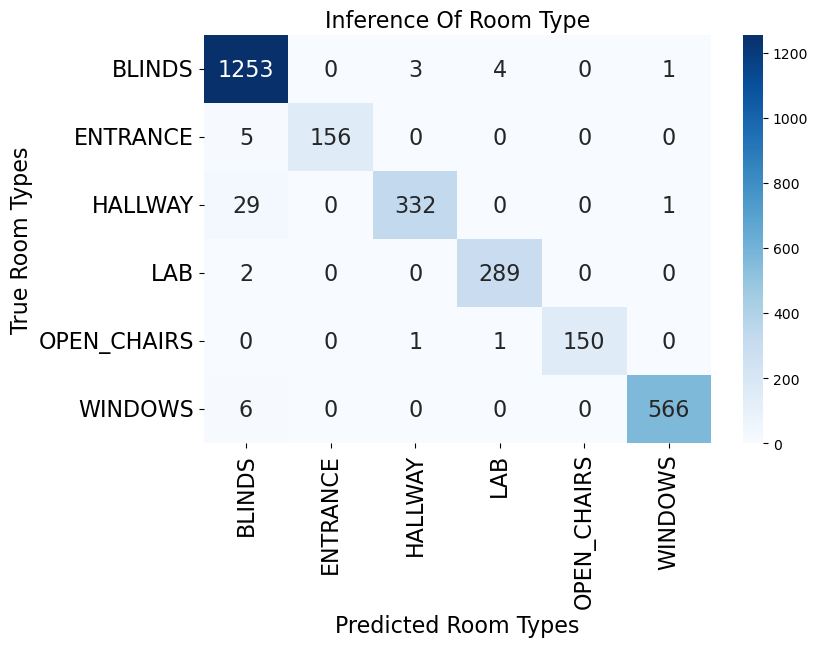

In [13]:
labels = le.classes_  
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.xlabel('Predicted Room Types', fontsize = 16)
plt.ylabel('True Room Types', fontsize = 16)
plt.title('Inference Of Room Type', fontsize = 16)
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [15]:
folds = 5
kf = KFold(n_splits = folds, shuffle = True)
results = cross_val_score(svm, X, y, cv=kf)
print(results.mean())

0.4925314131131791
